In [7]:
from sqlalchemy import create_engine
from io import BytesIO
import requests
import pandas as pd
import os
import sqlalchemy
sqlite = create_engine('sqlite:///D:/files/Bankit.sqlite')
import sqlite3
import sys
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.0f}".format

In [ ]:
df = pd.read_sql(f"""select DATA_OSS,
[Elemento:1],[Descrizione:1],
[Elemento:2],[Descrizione:2] settore,
[Elemento:3],[Descrizione:3] regione,
CAST(VALORE / 1000 AS INTEGER) AS VALORE 
from TFR20232C where
/* DATA_OSS = '2025-03-31' and */
[Elemento:1] = 'SBI25' and
[Elemento:3] IN ('ITF1','ITF2','ITF3','ITF4','ITF5','ITF6','ITG1', 'ITG2') and
[Elemento:2] IN ('1004999') and
Descrizione = 'Prestiti' order by DATA_OSS desc""", sqlite)

In [72]:
df.head()

,DATA_OSS,Elemento:1,Descrizione:1,Elemento:2,settore,Elemento:3,regione,VALORE
0,2025-03-31,SBI25,Società non finanziarie e famiglie produttrici,1004999,Totale ateco al netto della sez. U,ITF1,Abruzzo,9559
1,2025-03-31,SBI25,Società non finanziarie e famiglie produttrici,1004999,Totale ateco al netto della sez. U,ITF2,Molise,1309
2,2025-03-31,SBI25,Società non finanziarie e famiglie produttrici,1004999,Totale ateco al netto della sez. U,ITF3,Campania,30505
3,2025-03-31,SBI25,Società non finanziarie e famiglie produttrici,1004999,Totale ateco al netto della sez. U,ITF4,Puglia,21010
4,2025-03-31,SBI25,Società non finanziarie e famiglie produttrici,1004999,Totale ateco al netto della sez. U,ITF5,Basilicata,2630


In [73]:
pd.pivot_table(df, index = 'DATA_OSS', columns = ['regione','settore'], values = 'VALORE')

regione,Abruzzo,Basilicata,Calabria,Campania,Molise,Puglia,Sardegna,Sicilia
settore,Totale ateco al netto della sez. U,Totale ateco al netto della sez. U,Totale ateco al netto della sez. U,Totale ateco al netto della sez. U,Totale ateco al netto della sez. U,Totale ateco al netto della sez. U,Totale ateco al netto della sez. U,Totale ateco al netto della sez. U
DATA_OSS,,,,,,,,
2011-03-31,"15,952","4,084","9,455","39,392","2,350","28,598","13,430","31,089"
2011-06-30,"16,152","4,114","9,552","40,362","2,348","29,068","13,450","31,498"
2011-09-30,"16,314","4,182","9,483","40,460","2,337","29,521","13,345","31,539"
2011-12-31,"16,312","4,161","9,339","40,381","2,318","29,254","13,332","31,658"
2012-03-31,"16,174","4,071","9,222","39,768","2,268","28,874","13,020","31,713"
2012-06-30,"16,204","4,049","9,176","39,526","2,221","28,874","12,755","31,631"
2012-09-30,"15,787","4,084","9,078","39,043","2,214","28,920","12,636","31,344"
2012-12-31,"15,717","4,050","9,119","38,589","2,203","28,940","12,468","31,015"


## Andamento Impieghi vs Depositi

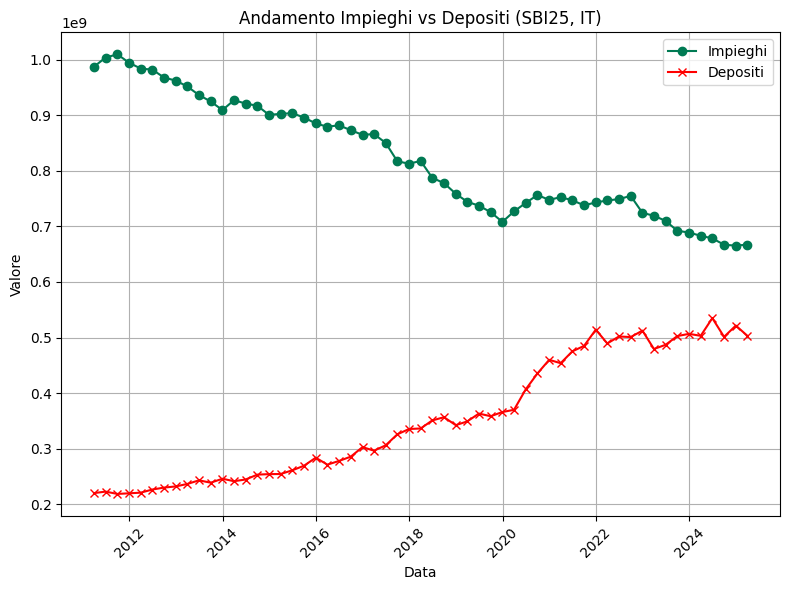

In [8]:
area = 'IT'
set_ctp = 'SBI25' # SBI25, S11, S14BI2, SBI33
# impieghi ['SBI25', 'S11', 'S14BI2', 'S13', 'S12BI7', '600', 'SBI42', 'SBI33']
# depositi ['600', 'SBI42', 'SBI33', 'S13', 'S12BI7', 'SBI25', 'S14BI2', 'S11']
impieghi = pd.read_sql(f"""select DATA_OSS, valore from TFR20232C where SET_CTP='{set_ctp}' and LOC_CTP= '{area}' and ATECO_CTP = '1004999' order by 1""", sqlite)
depositi = pd.read_sql(f"""select DATA_OSS, valore from TFR20269C where SET_CTP='{set_ctp}' and LOC_CTP= '{area}' and FENEC = '52000100' order by 1""", sqlite)
impieghi['DATA_OSS'] = pd.to_datetime(impieghi['DATA_OSS'])
depositi['DATA_OSS'] = pd.to_datetime(depositi['DATA_OSS'])

impieghi = impieghi.rename(columns={'VALORE': 'Impieghi'})
depositi = depositi.rename(columns={'VALORE': 'Depositi'})
df_plot = pd.merge(impieghi, depositi, on='DATA_OSS', how='outer').sort_values('DATA_OSS')
title = f"Andamento Impieghi vs Depositi ({set_ctp}, {area})"

plt.figure(figsize=(8, 6))
plt.plot(df_plot['DATA_OSS'], df_plot['Impieghi'], label='Impieghi', marker='o', color = '#007a53')
plt.plot(df_plot['DATA_OSS'], df_plot['Depositi'], label='Depositi', marker='x', color = '#FF0000')
plt.xlabel('Data')
plt.ylabel('Valore')
plt.title(title)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- SBI25	Società non finanziarie e famiglie produttrici
- S11 Società non finanziarie
- SBI33	Società di persone, semplici, di fatto e ditte individuali con meno di 20 addetti
- S14BI2 Famiglie produttrici (fino a 5 addetti)

## Forbice tra Depositi e Impieghi

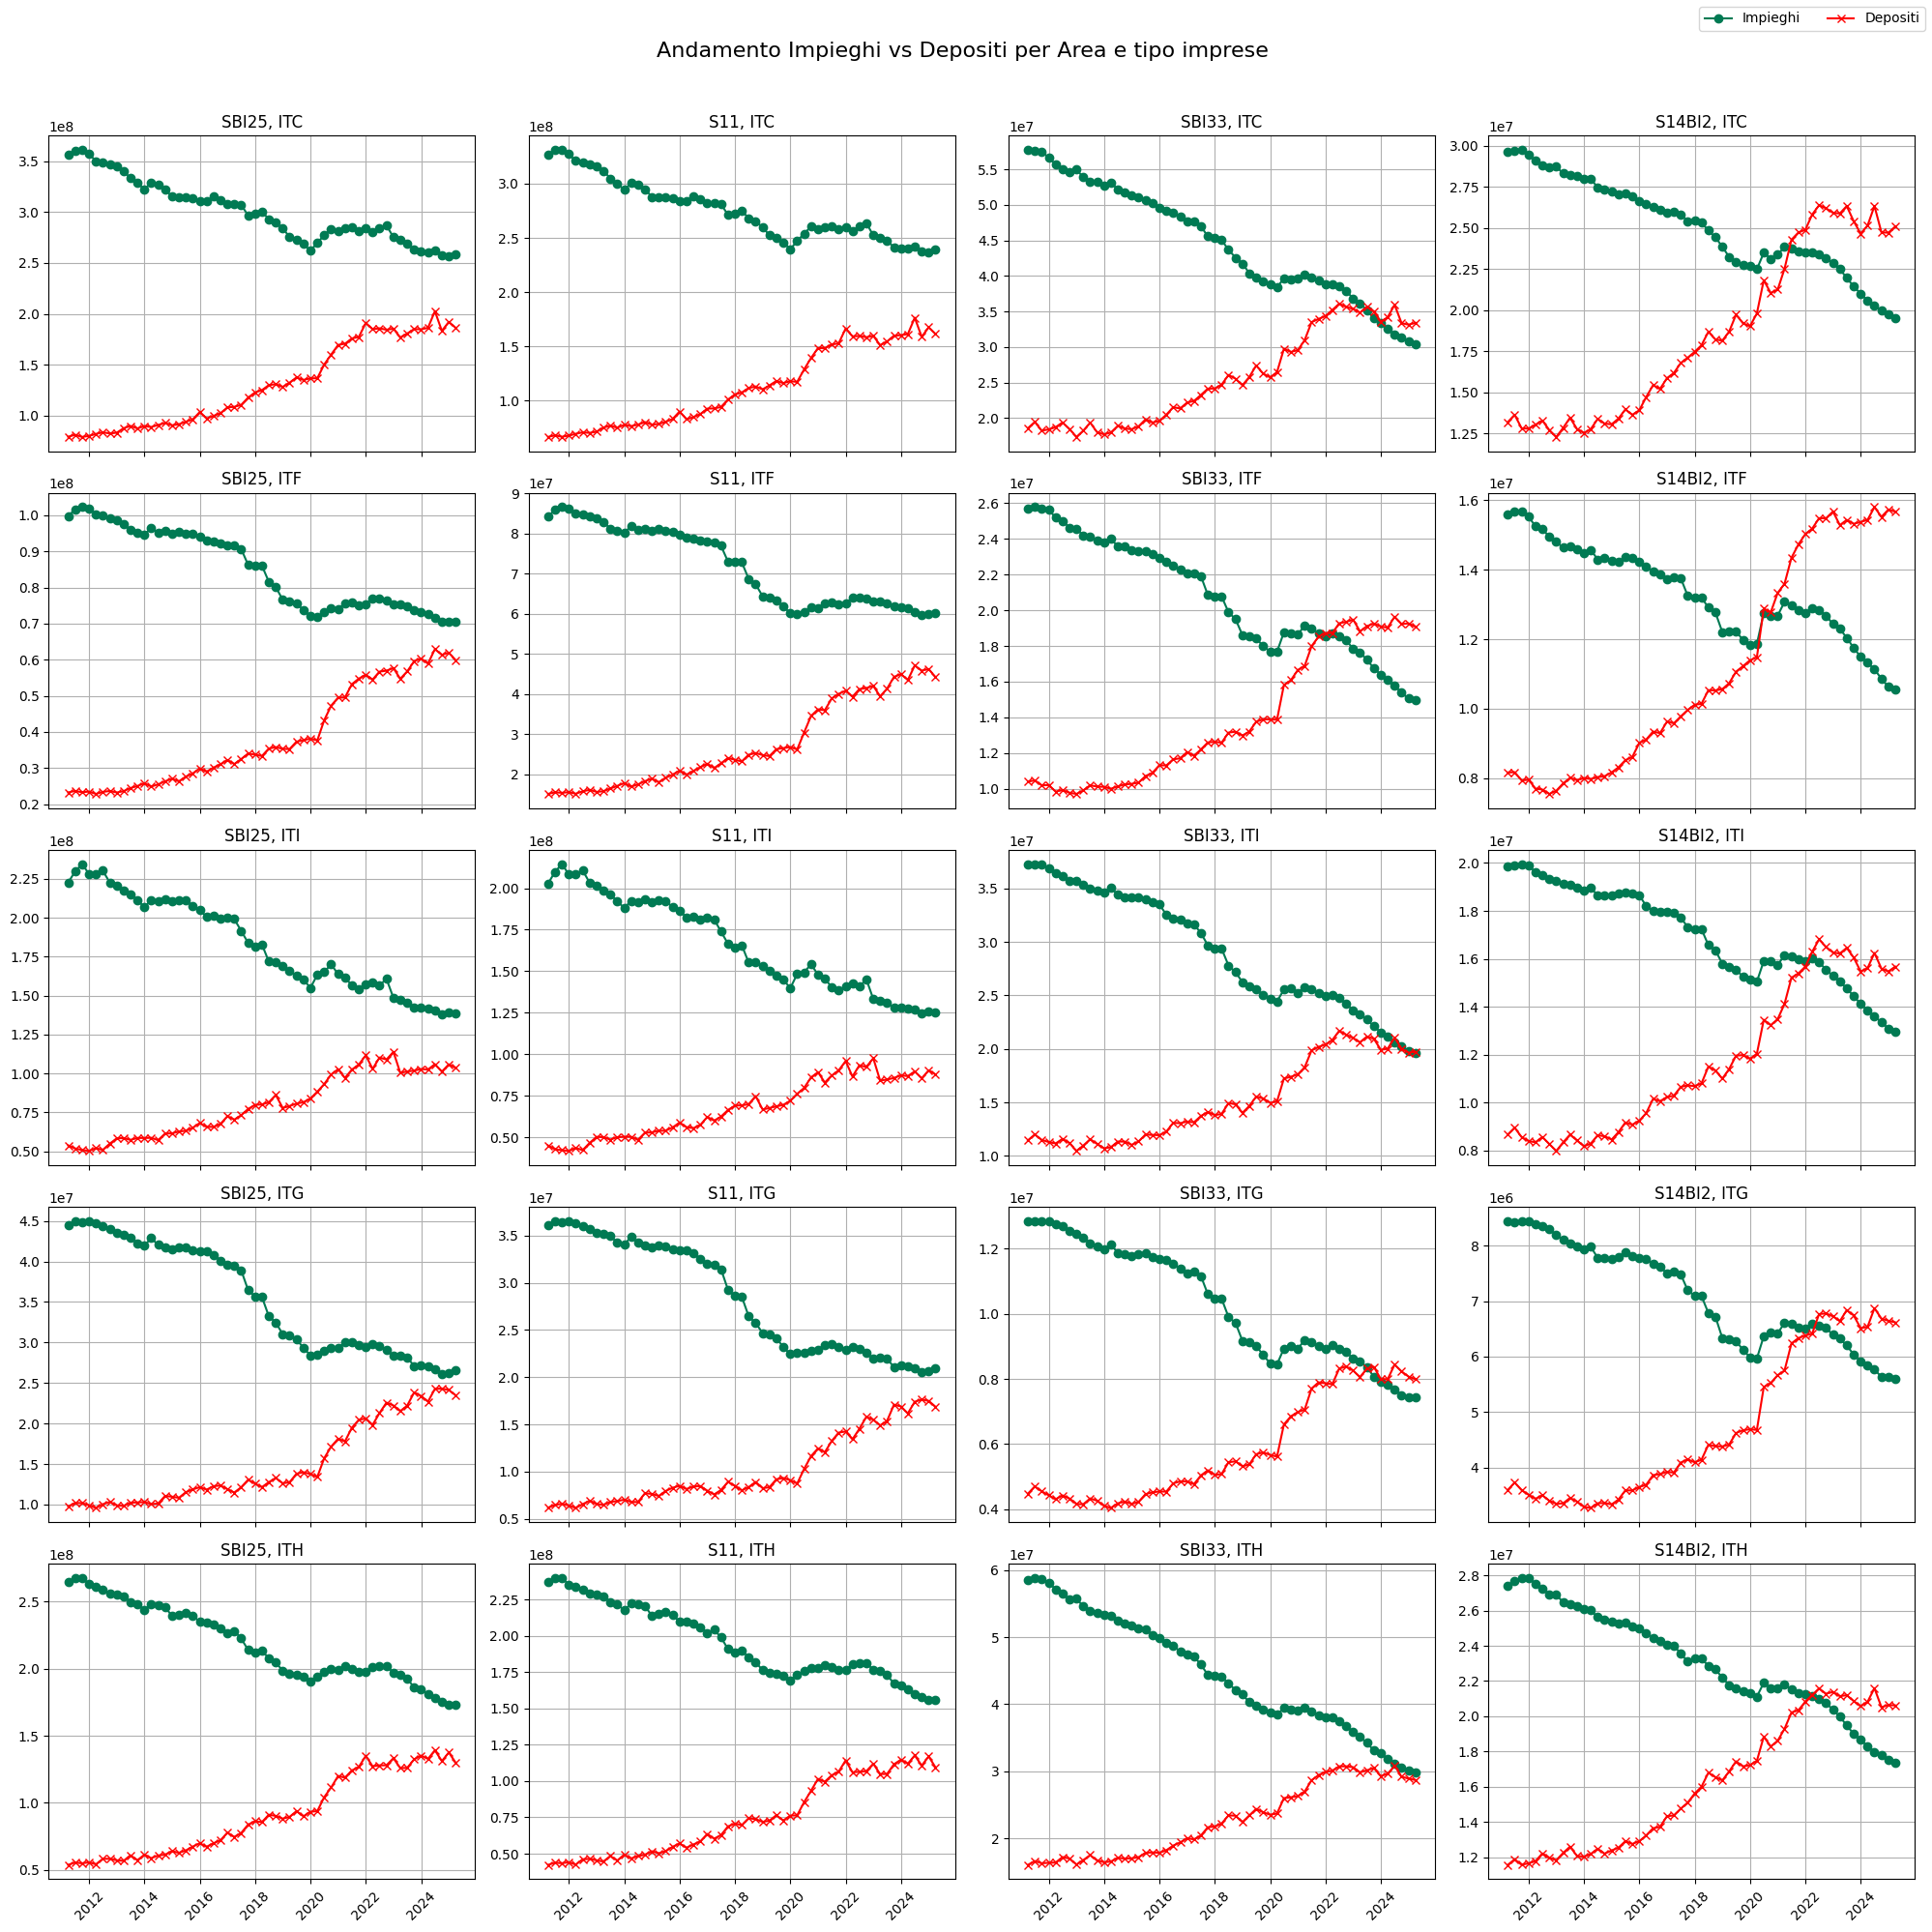

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

# === Parametri ===
areas = ['ITC','ITF','ITI','ITG', 'ITH']
set_ctps = ['SBI25', 'S11', 'SBI33', 'S14BI2']

# === Facet settings ===
nrows = len(areas)
ncols = len(set_ctps)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows), sharex=True, sharey=False)

# === Loop su tutte le combinazioni ===
for (i, area), (j, set_ctp) in product(enumerate(areas), enumerate(set_ctps)):
    ax = axes[i, j] if len(areas) > 1 else axes[j]  # compatibilità 1 riga
    area_str = area
    query_imp = f"""
        SELECT DATA_OSS, VALORE 
        FROM TFR20232C 
        WHERE SET_CTP='{set_ctp}' AND LOC_CTP='{area_str}' AND ATECO_CTP = '1004999'
        ORDER BY DATA_OSS
    """
    query_dep = f"""
        SELECT DATA_OSS, VALORE 
        FROM TFR20269C 
        WHERE SET_CTP='{set_ctp}' AND LOC_CTP='{area_str}' AND FENEC = '52000100'
        ORDER BY DATA_OSS
    """
    
    impieghi = pd.read_sql(query_imp, sqlite)
    depositi = pd.read_sql(query_dep, sqlite)
    
    if impieghi.empty and depositi.empty:
        ax.set_title(f"{set_ctp}, {area} (No data)")
        ax.axis('off')
        continue

    impieghi['DATA_OSS'] = pd.to_datetime(impieghi['DATA_OSS'])
    depositi['DATA_OSS'] = pd.to_datetime(depositi['DATA_OSS'])
    impieghi = impieghi.rename(columns={'VALORE': 'Impieghi'})
    depositi = depositi.rename(columns={'VALORE': 'Depositi'})
    df_plot = pd.merge(impieghi, depositi, on='DATA_OSS', how='outer').sort_values('DATA_OSS')

    ax.plot(df_plot['DATA_OSS'], df_plot['Impieghi'], label='Impieghi', marker='o', color='#007a53')
    ax.plot(df_plot['DATA_OSS'], df_plot['Depositi'], label='Depositi', marker='x', color='#FF0000')
    ax.set_title(f"{set_ctp}, {area}")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# === Layout e legenda ===
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=4)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Andamento Impieghi vs Depositi per Area e tipo imprese", fontsize=16)
plt.savefig("D:/impieghi_vs_depositi_facet.png", dpi=300, bbox_inches='tight')
plt.show()


## Forbice tra Depositi e Impieghi (indice base 100)
la heatmap è basata sulla media dei valori normalizzati (base 100) su tutto il periodo disponibile (es. 2012–2024)

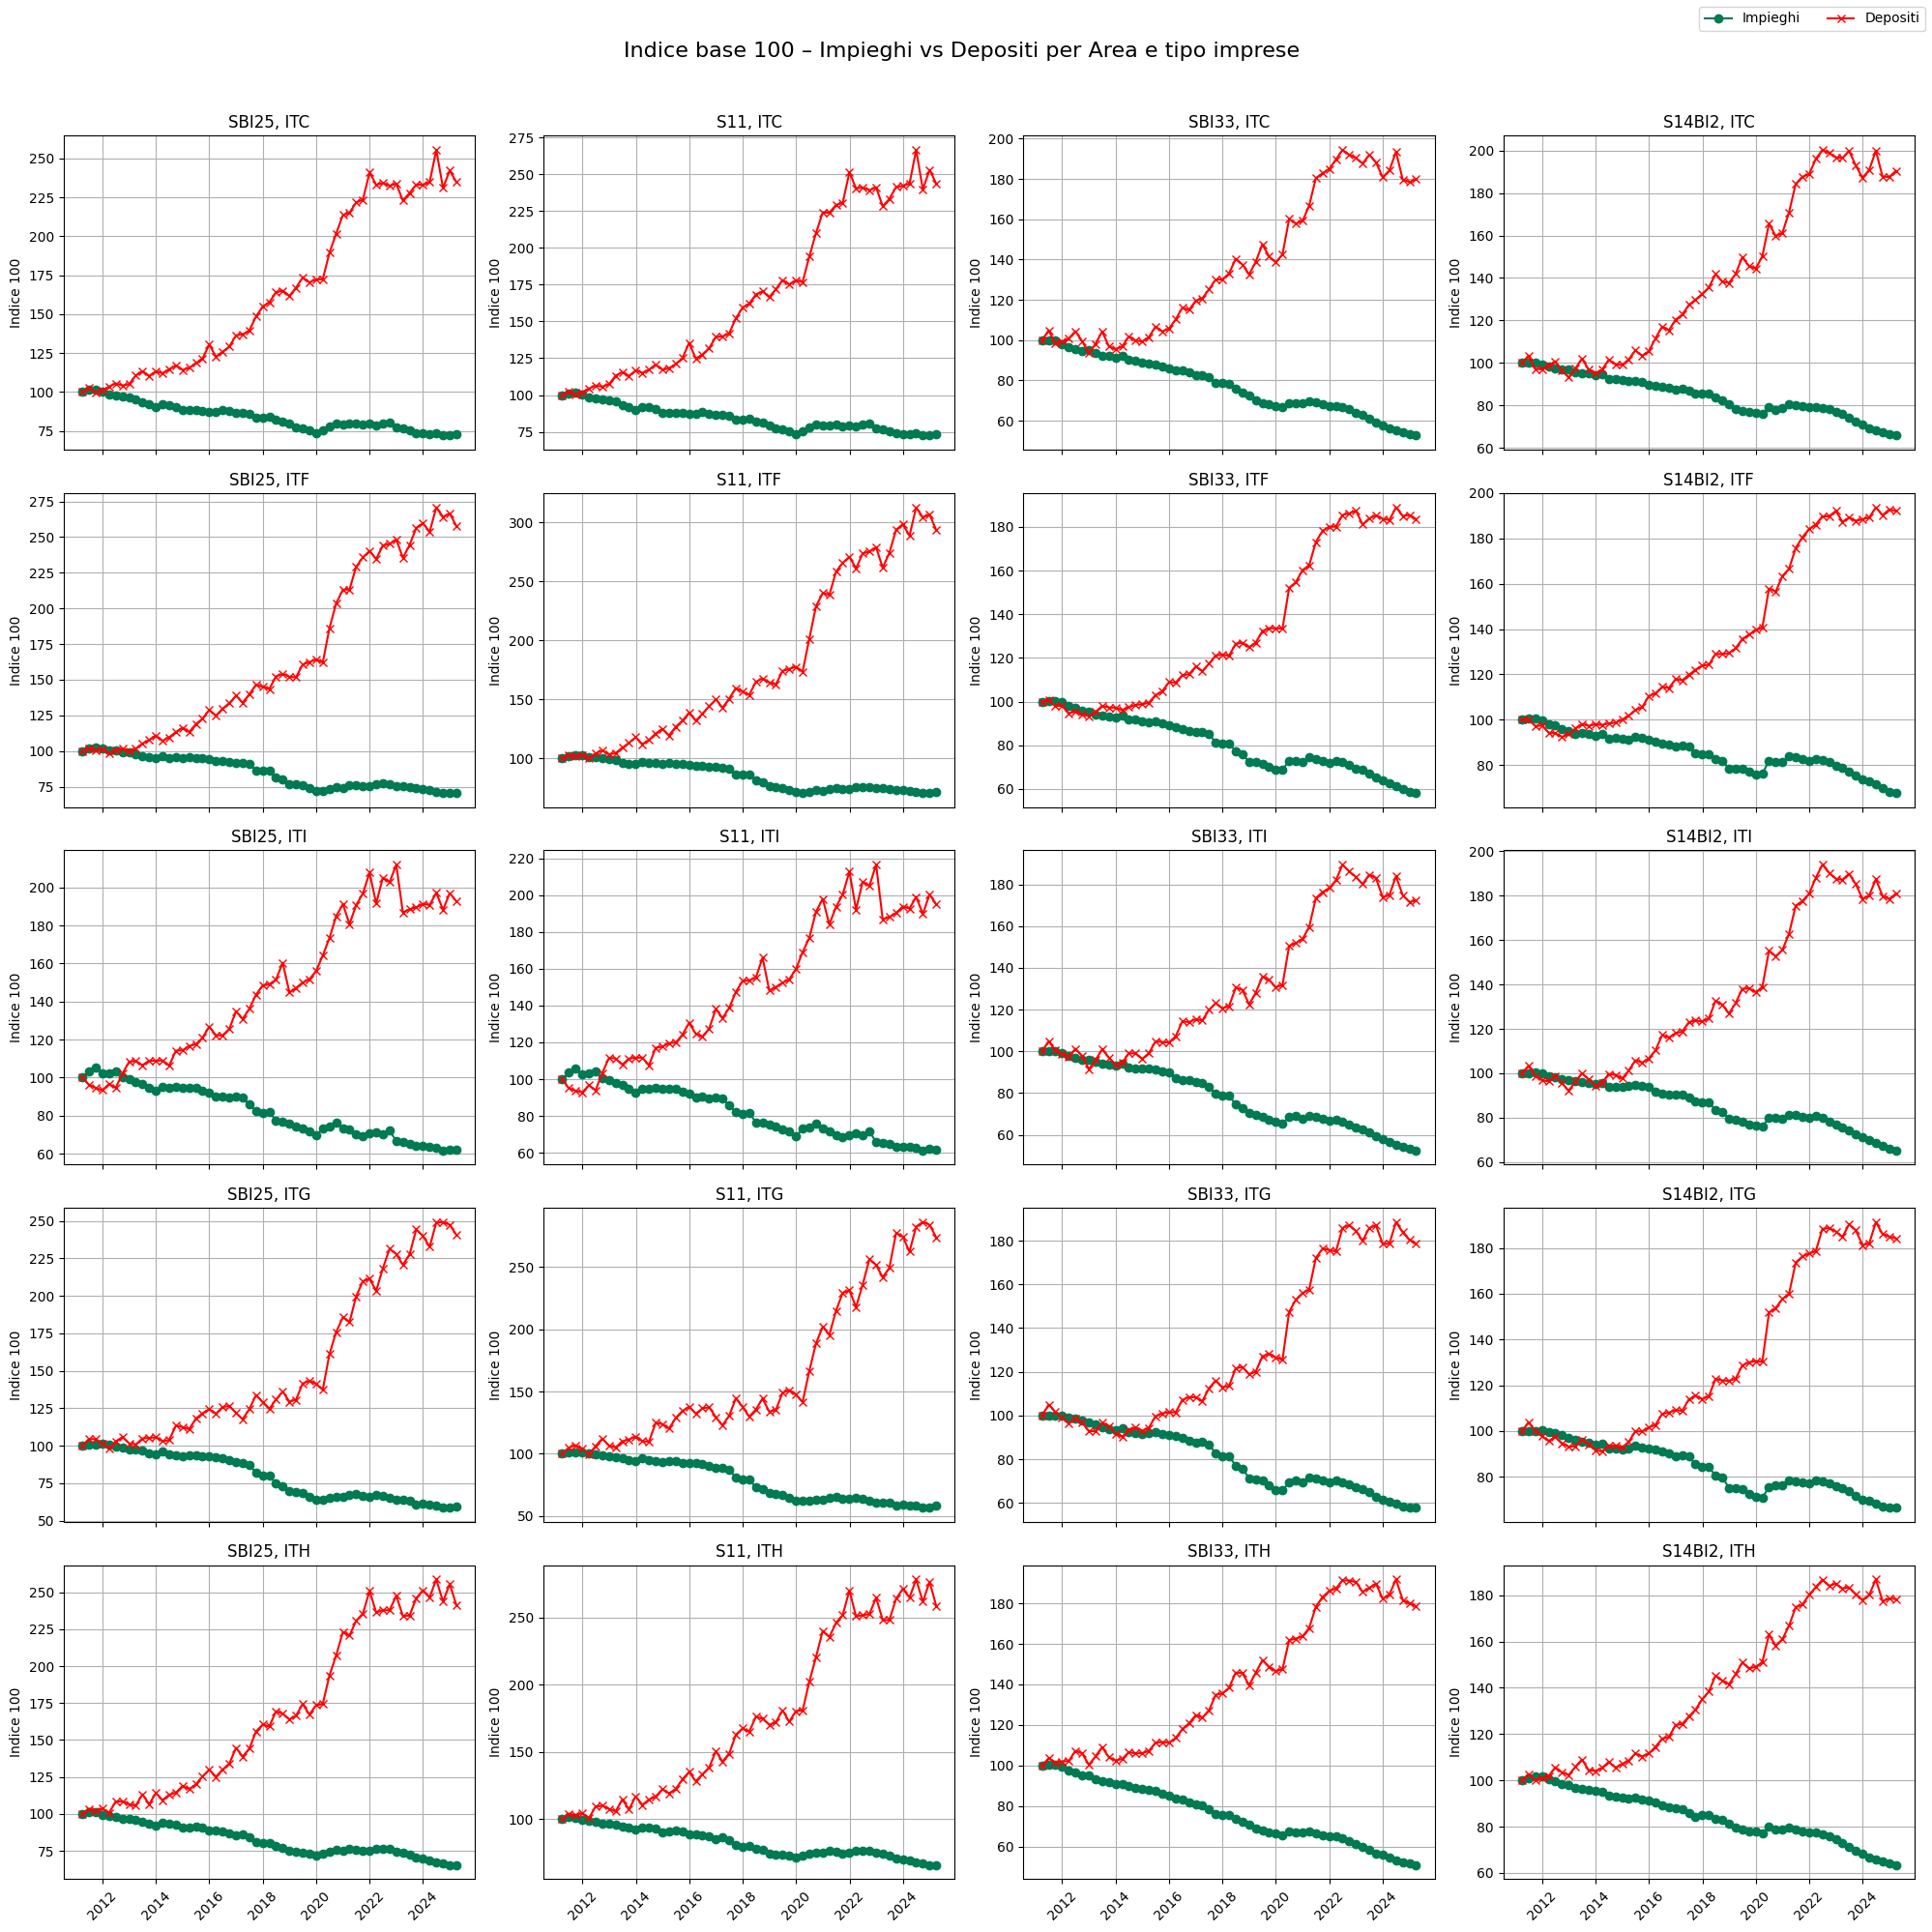

In [10]:
# === Parametri ===
areas = ['ITC','ITF','ITI','ITG', 'ITH']
set_ctps = ['SBI25', 'S11', 'SBI33', 'S14BI2']
indicatori = []

# === Facet plot ===
nrows = len(areas)
ncols = len(set_ctps)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows), sharex=True, sharey=False)

for i, area in enumerate(areas):
    for j, set_ctp in enumerate(set_ctps):
        ax = axes[i, j]
        query_imp = f"""
            SELECT DATA_OSS, VALORE 
            FROM TFR20232C 
            WHERE SET_CTP='{set_ctp}' AND LOC_CTP='{area}' AND ATECO_CTP = '1004999'
            ORDER BY DATA_OSS
        """
        query_dep = f"""
            SELECT DATA_OSS, VALORE 
            FROM TFR20269C 
            WHERE SET_CTP='{set_ctp}' AND LOC_CTP='{area}' AND FENEC = '52000100'
            ORDER BY DATA_OSS
        """

        impieghi = pd.read_sql(query_imp, sqlite)
        depositi = pd.read_sql(query_dep, sqlite)

        if impieghi.empty and depositi.empty:
            ax.set_title(f"{set_ctp}, {area} (No data)")
            ax.axis('off')
            continue

        impieghi['DATA_OSS'] = pd.to_datetime(impieghi['DATA_OSS'])
        depositi['DATA_OSS'] = pd.to_datetime(depositi['DATA_OSS'])
        impieghi = impieghi.rename(columns={'VALORE': 'Impieghi'})
        depositi = depositi.rename(columns={'VALORE': 'Depositi'})

        df_plot = pd.merge(impieghi, depositi, on='DATA_OSS', how='outer').sort_values('DATA_OSS')

        # Normalizzazione base 100
        start_imp = df_plot['Impieghi'].dropna().iloc[0] if not df_plot['Impieghi'].dropna().empty else 1
        start_dep = df_plot['Depositi'].dropna().iloc[0] if not df_plot['Depositi'].dropna().empty else 1
        df_plot['Impieghi_norm'] = df_plot['Impieghi'] / start_imp * 100
        df_plot['Depositi_norm'] = df_plot['Depositi'] / start_dep * 100

        # === Plot ===
        ax.plot(df_plot['DATA_OSS'], df_plot['Impieghi_norm'], label='Impieghi', marker='o', color='#007a53')
        ax.plot(df_plot['DATA_OSS'], df_plot['Depositi_norm'], label='Depositi', marker='x', color='#FF0000')
        ax.set_title(f"{set_ctp}, {area}")
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylabel("Indice 100")
        ax.grid(True)

        # === Salva indicatori sintetici ===
        imp_mean = df_plot['Impieghi_norm'].mean()
        dep_mean = df_plot['Depositi_norm'].mean()
        indicatori.append({
            'area': area,
            'set_ctp': set_ctp,
            'impieghi_base100': imp_mean,
            'depositi_base100': dep_mean,
            'forbice': dep_mean - imp_mean,
            'intermediazione': imp_mean / dep_mean if dep_mean else None
        })

# === Layout e salvataggio facet ===
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Indice base 100 – Impieghi vs Depositi per Area e tipo imprese", fontsize=16)
plt.savefig("D:/impieghi_vs_depositi_base100_facet.png", dpi=300, bbox_inches='tight')
plt.show()

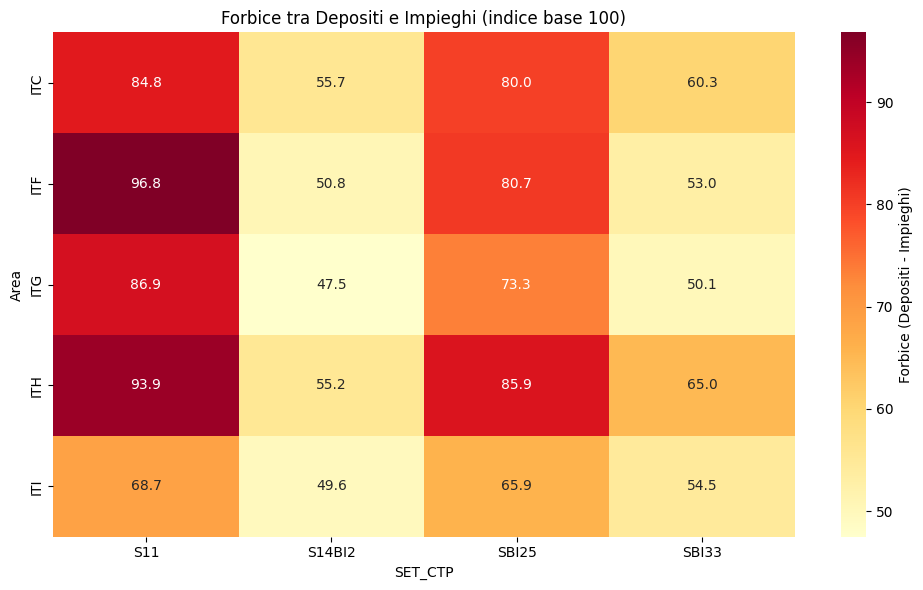

In [12]:
import seaborn as sns
# === Indicatori sintetici: tabella + heatmap ===
df_ind = pd.DataFrame(indicatori)
df_ind.to_csv("D:/indicatori_sintetici_impieghi_vs_depositi.csv", index=False)

# === Heatmap della forbice ===
pivot_forbice = df_ind.pivot(index='area', columns='set_ctp', values='forbice')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_forbice, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Forbice (Depositi - Impieghi)'})
plt.title("Forbice tra Depositi e Impieghi (indice base 100)")
plt.ylabel("Area")
plt.xlabel("SET_CTP")
plt.tight_layout()
plt.savefig("D:/heatmap_forbice_impieghi_vs_depositi.png", dpi=300)
plt.show()

- SBI25	Società non finanziarie e famiglie produttrici
- S11 Società non finanziarie
- SBI33	Società di persone, semplici, di fatto e ditte individuali con meno di 20 addetti
- S14BI2 Famiglie produttrici (fino a 5 addetti)

## backup

In [27]:
tabella = 'TFR20232C'
data = pd.read_sql_table(tabella, 'sqlite:///D:/files//Bankit.sqlite')

In [30]:
tabella = 'TFR20269C'
data = pd.read_sql_table(tabella, 'sqlite:///D:/files//Bankit.sqlite')

In [31]:
data['SET_CTP'].unique()

array(['600', 'SBI42', 'SBI33', 'S13', 'S12BI7', 'SBI25', 'S14BI2', 'S11'],
      dtype=object)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Converto DATA_OSS in datetime (se necessario)
impieghi['DATA_OSS'] = pd.to_datetime(impieghi['DATA_OSS'])

# Ordino per data crescente
impieghi = impieghi.sort_values(by='DATA_OSS')

# Line plot
plt.figure(figsize=(10, 5))
plt.plot(impieghi['DATA_OSS'], impieghi['VALORE'], marker='o', color = '#007a53')
plt.title('TFR20232 - Evoluzione degli impieghi alle imprese')
plt.xlabel('Data di Osservazione')
plt.ylabel('Valore')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

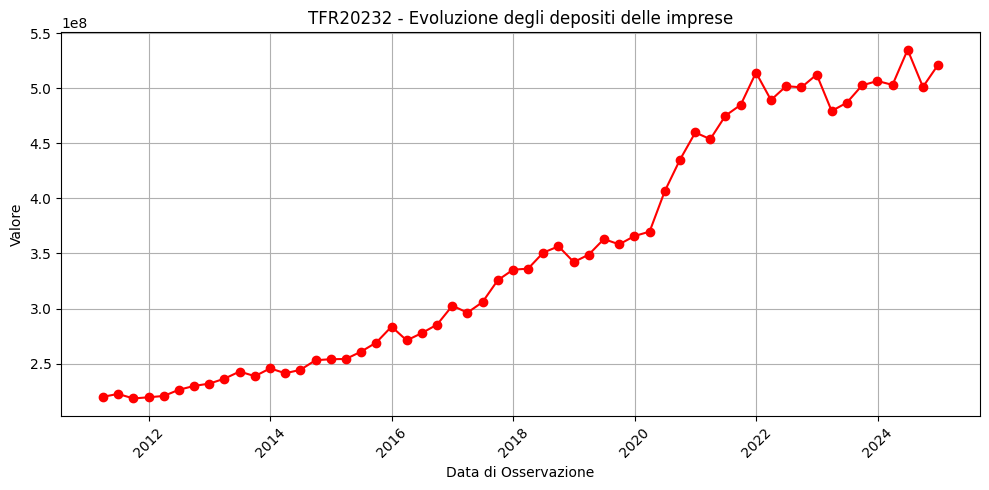

In [11]:
# Converto DATA_OSS in datetime (se necessario)
depositi['DATA_OSS'] = pd.to_datetime(depositi['DATA_OSS'])
plt.figure(figsize=(10, 5))
plt.plot(depositi['DATA_OSS'], depositi['VALORE'], marker='o', color = '#FF0000')
plt.title('TFR20232 - Evoluzione degli depositi delle imprese')
plt.xlabel('Data di Osservazione')
plt.ylabel('Valore')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()